In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')



In [30]:
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [3]:
# Runge-Kutta method of 4rth order for 3 dimensions (susceptible a, infected b and recovered r)
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [4]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

# Results obtained for N=world population, only one initial infected case,  β=0.3 ,  γ=0.5  and a leap pass  hs=0.1  are shown below


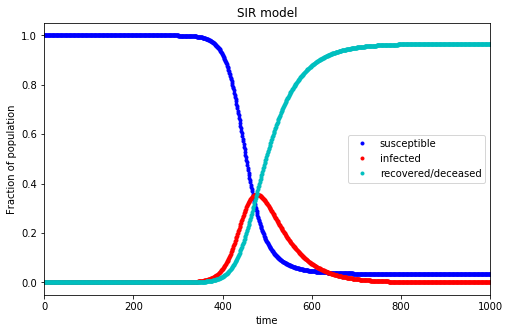

In [5]:
# Parameters of the model
N = 7800*(10**6)
b0 = 0
beta = 0.7
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('SIR_example.png')
plt.show()

In [6]:
def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

In [7]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]


# Fit SIR parameters to real data 
The SIR model is purely theoretical, and we are interested into a real approximation of the COVID-19 expansion in order to extract insights and understand the transmission of the virus. Hence, we need to extract the  β  and  γ  paramaters for each case if we hope to be able to predict the evolution of the system.

In [10]:
data=pd.read_csv("datasets_628742_1183652_Egy-COVID-19.csv")

In [16]:
data.head(10)
data.set_index("date",inplace=True)

In [22]:
data.head(10)

,new_confirmed,new_deaths,new_recovered,new_pos_to_neg,active_pos,cases_in_hospital,total_confirmed,total_deaths,total_recovered,total_pos_to_neg,lockdown,lockdown_duration
date,,,,,,,,,,,,
3/1/2020,1,0,0,0,1,1,2,0,1,1,No,0
3/2/2020,0,0,0,0,1,1,2,0,1,1,No,0
3/3/2020,0,0,0,0,1,1,2,0,1,1,No,0
3/4/2020,0,0,0,0,1,1,2,0,1,1,No,0
3/5/2020,1,0,0,0,2,2,3,0,1,1,No,0
3/6/2020,12,0,0,0,14,14,15,0,1,1,No,0
3/7/2020,33,0,0,0,47,47,48,0,1,1,No,0
3/8/2020,7,1,0,0,54,54,55,1,1,1,No,0
3/9/2020,4,0,0,20,38,58,59,1,1,21,No,0


Text(0, 0.5, 'Fraction of population infected')

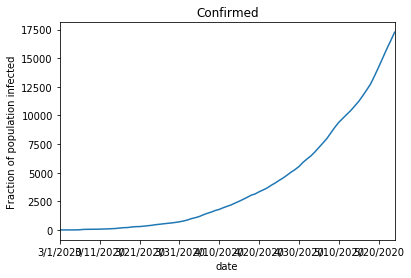

In [17]:
data.total_confirmed.plot(ax=plt.gca(), title='Confirmed')
plt.ylabel("Fraction of population infected")

In [23]:
data["day_count"]=[i for i in range(len(data))]

In [25]:
ydata = [i for i in data.total_confirmed]
xdata = data.day_count


In [26]:
data.head(10)

,new_confirmed,new_deaths,new_recovered,new_pos_to_neg,active_pos,cases_in_hospital,total_confirmed,total_deaths,total_recovered,total_pos_to_neg,lockdown,lockdown_duration,day_count
date,,,,,,,,,,,,,
3/1/2020,1,0,0,0,1,1,2,0,1,1,No,0,0
3/2/2020,0,0,0,0,1,1,2,0,1,1,No,0,1
3/3/2020,0,0,0,0,1,1,2,0,1,1,No,0,2
3/4/2020,0,0,0,0,1,1,2,0,1,1,No,0,3
3/5/2020,1,0,0,0,2,2,3,0,1,1,No,0,4
3/6/2020,12,0,0,0,14,14,15,0,1,1,No,0,5
3/7/2020,33,0,0,0,47,47,48,0,1,1,No,0,6
3/8/2020,7,1,0,0,54,54,55,1,1,1,No,0,7
3/9/2020,4,0,0,20,38,58,59,1,1,21,No,0,8


In [27]:
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

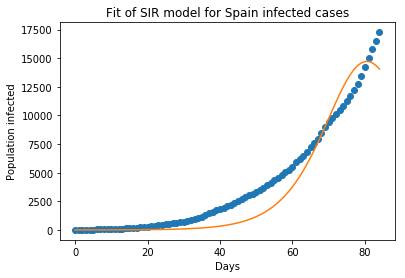

Optimal parameters: beta = 2.3821566944272496  and gamma =  2.2540696219022394


In [32]:
N = 10000000.0
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Spain infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])